In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
results=pd.DataFrame()
for seed_num in range(2020,2025):
    seed_num=str(seed_num)
    dnn = pd.read_csv('../tmp_data/output/dnn_s'+seed_num+'_tr0_lstm0_gru0_rnn0_dnn2048.csv')
    rnn = pd.read_csv('../tmp_data/output/rnn_s'+seed_num+'_tr0_lstm0_gru0_rnn1_dnn2048.csv')
    gru = pd.read_csv('../tmp_data/output/gru_s'+seed_num+'_tr0_lstm0_gru1_rnn0_dnn2048.csv')
    lstm1 = pd.read_csv('../tmp_data/output/lstm_s'+seed_num+'_tr0_lstm1_gru0_rnn0_dnn2048.csv')
    lstm2 = pd.read_csv('../tmp_data/output/lstm_s'+seed_num+'_tr0_lstm2_gru0_rnn0_dnn2048.csv')
    tr1 = pd.read_csv('../tmp_data/output/tr_s'+seed_num+'_tr1_lstm0_gru0_rnn0_dnn2048.csv')
    tr2 = pd.read_csv('../tmp_data/output/tr_s'+seed_num+'_tr2_lstm0_gru0_rnn0_dnn2048.csv')
    trlstm = pd.read_csv('../tmp_data/output/trlstm_s'+seed_num+'_tr1_lstm1_gru0_rnn0_dnn2048.csv')
    noseq = pd.read_csv('../tmp_data/output/no_seq_s'+seed_num+'_tr0_lstm0_gru0_rnn0_dnn0.csv')
    res=pd.concat([dnn,rnn,gru,lstm1,lstm2,tr1,tr2,trlstm,noseq])
    result=res.groupby('model_name').last()
    result['train_time']=res.groupby('model_name')['train_time'].sum()
    result=result[['train_time','test_time','test_sum_acc','training parameters']]
    result.index=['dnn','gru','lstm1','lstm2','no_seq','rnn','tr1','tr2','trlstm']
    result['seed']=seed_num
    results=pd.concat([results,result])
    final_res=results.reset_index().groupby('index').mean()
    final_res['test_acc_std']=results.reset_index().groupby('index')['test_sum_acc'].std()
final_res.to_csv('../tmp_data/result.csv')

In [3]:
final_res

,train_time,test_time,test_sum_acc,training parameters,test_acc_std
index,,,,,
dnn,5661.275046,390.252883,1.434269,9489940,0.000499
gru,9130.429295,474.196364,1.437129,13690388,0.000433
lstm1,9505.604068,492.150932,1.441483,14741012,0.000355
lstm2,12310.556465,584.283869,1.438155,21040660,0.000452
no_seq,2009.113727,231.762141,1.289269,278548,0.000132
rnn,8457.548015,466.079706,1.433803,11589140,0.000343
tr1,9423.219217,539.865061,1.438775,12642324,0.000330
tr2,13079.241799,666.319724,1.440001,15794708,0.000580
trlstm,12944.186592,614.622657,1.439992,17893396,0.000326


In [4]:
lr0001e4={'train_acc':[0.406647,0.423649,0.435727,0.449902],
          'test_acc':[0.420303,0.436464,0.442396,0.457657],
          'final_acc': 1.423259}
lr00001e4={'train_acc':[0.396062,0.451499,0.470079,0.495348],
           'test_acc':[0.438843,0.458581,0.464254,0.474008],
           'final_acc':1.440571}
lr00001e5={'train_acc':[0.396816,0.451377,0.470159,0.485773,0.516336],
           'test_acc':[0.440656,0.456433,0.463005,0.463499,0.470778],
           'final_acc':1.436599}
lr00005e4={'train_acc':[0.409917,0.439468,0.448900,0.466627],
          'test_acc':[0.432283,0.444519,0.448696,0.471037],
          'final_acc':1.437821}
res=pd.DataFrame(lr0001e4).append(pd.DataFrame(lr00001e4)).append(pd.DataFrame(lr00001e5)).append(pd.DataFrame(lr00005e4))
res['model']=['lr=0.001,epoch=4']*4+['lr=0.0001,epoch=4']*4+['lr=0.0001,epoch=5']*5+['lr=0.0005,epoch=4']*4
res['epoch']=[1,2,3,4]+[1,2,3,4]+[1,2,3,4,5]+[1,2,3,4]
res['epoch']=res['epoch'].astype("int8")
train_res=res.copy()
test_res=res.copy()
train_res.rename(columns={'train_acc':'acc'})
train_res['type']='train'
test_res['type']='test'
res=pd.concat([test_res.rename(columns={'test_acc':'acc'}),train_res.rename(columns={'train_acc':'acc'})]).drop(columns=['train_acc','test_acc'])

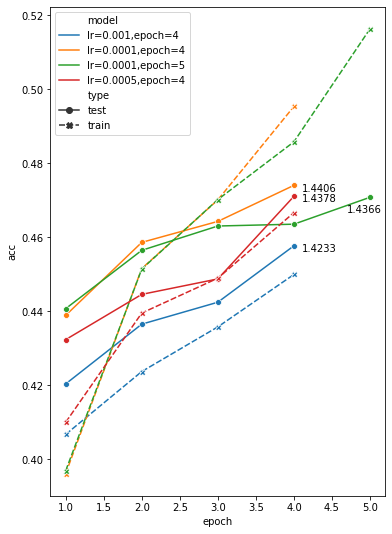

In [5]:
plt.figure(figsize=(6, 9))
sns.lineplot(data=res,x="epoch", y="acc",style='type',hue="model",markers=True)
plt.text(4.1,0.471037-0.0015,'1.4378')
plt.text(4.1,0.474008-0.0015,'1.4406')
plt.text(4.1,0.457657-0.0015,'1.4233')
plt.text(4.7,0.470778-0.004,'1.4366')
plt.show()